In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [5]:
epi_0 = pd.read_csv('epistasis_0.csv')
#epi_1 = pd.read_csv('epistasis_1.csv')
#epi_2 = pd.read_csv('epistasis_2.csv')

### Average Slope Values

In [6]:
print('No epistasis')
print('mean: ' + str(epi_0['Slope'].mean()))
print('standard deviation: ' + str(epi_0['Slope'].std()) + '\n')

print('First-order epistasis')
print('mean: ' + str(epi_1['Slope'].mean()))
print('standard deviation: ' + str(epi_1['Slope'].std()) + '\n')

print('Second-order epistasis')
print('mean: ' + str(epi_2['Slope'].mean()))
print('standard deviation: ' + str(epi_2['Slope'].std()) + '\n')

No epistasis
mean: 1.1044891914549813
standard deviation: 0.3380475546335793

First-order epistasis


TypeError: Could not convert string '[np.float64(1.0838880956240524)][np.float64(0.5134763057944519)][np.float64(1.3442124891964837)][np.float64(0.3272089203632431)][np.float64(1.1039619211232248)][np.float64(0.5887299287691355)][np.float64(0.7299775776604827)][np.float64(1.2873671665410844)][np.float64(0.4323205467570334)][np.float64(0.6328431671961988)][np.float64(0.8631016692033261)][np.float64(1.3173207736723658)][np.float64(0.31543005870012625)][np.float64(0.9633981526563157)][np.float64(0.8461853535666548)][np.float64(1.087386328507782)][np.float64(0.6151339643373183)][np.float64(0.8395348252265769)][np.float64(1.1092158360424516)][np.float64(0.7194928472374015)][np.float64(1.2292353003185792)][np.float64(0.882508218377785)][np.float64(0.5561854080689265)][np.float64(0.43238644286829064)][np.float64(0.6865129009629198)][np.float64(1.152224617488937)][np.float64(1.13594801909743)][np.float64(0.9484715279062542)][np.float64(1.1696080070665358)][np.float64(1.0991001768832585)][np.float64(0.9419236761214529)][np.float64(1.021280807044407)][np.float64(0.884422631574328)][np.float64(1.1291498689638395)][np.float64(1.106903543181693)][np.float64(1.2385001824197877)][np.float64(0.6667912933483646)][np.float64(0.9173809689193569)][np.float64(0.6934207397841416)][np.float64(0.7936300858016229)][np.float64(0.757828039061125)][np.float64(0.37094347249828147)][np.float64(0.8869021086805001)][np.float64(0.6344732086061416)][np.float64(0.5785959302298568)][np.float64(1.140407265114636)][np.float64(0.3865620352485736)][np.float64(0.877840350599269)][np.float64(0.9042396086440649)][np.float64(0.7746132221695283)][np.float64(0.7151441284937065)][np.float64(1.4501374045886732)][np.float64(1.0933323232817753)][np.float64(0.3170168355409023)][np.float64(1.4068901034916543)][np.float64(1.337188103608817)][np.float64(0.5020927861847848)][np.float64(0.7603731584687411)][np.float64(0.4713661680838464)][np.float64(0.23406468718876106)][np.float64(0.961649216940263)][np.float64(1.6313511098161104)][np.float64(0.9384337367522461)][np.float64(0.8386267731843575)][np.float64(0.769611419804846)][np.float64(0.8298541685828199)][np.float64(0.6905792998038952)][np.float64(0.9061877500781458)][np.float64(0.9828134971188532)][np.float64(1.2878099713541635)][np.float64(0.639973757276458)][np.float64(0.8458223339083768)][np.float64(0.937960526612067)][np.float64(1.06005394831481)][np.float64(0.3178372199711911)][np.float64(1.2669226514444183)][np.float64(0.8966550341335383)][np.float64(0.5053000446630977)][np.float64(1.0885433507952051)][np.float64(1.635233926927411)][np.float64(0.9252434724032209)][np.float64(0.4886887210625186)][np.float64(0.5647434183972595)][np.float64(1.174958015743708)][np.float64(1.1410615443883265)][np.float64(0.27646255407613884)][np.float64(1.609237378006971)][np.float64(0.6551858550039045)][np.float64(0.8296444670775155)][np.float64(0.7102561722714386)][np.float64(1.27573405573347)][np.float64(0.5055476813482936)][np.float64(0.5254951796245989)][np.float64(0.864767697913176)][np.float64(0.9707904804939143)][np.float64(0.5981804857106363)][np.float64(1.1877176637497577)][np.float64(1.0465848589536766)][np.float64(0.7771399101581467)][np.float64(1.0551935550907443)][np.float64(0.6908330160210957)][np.float64(0.3212355698653591)][np.float64(0.7457126413334415)][np.float64(0.43248123720378334)][np.float64(0.8984098452496655)][np.float64(0.9899366922284809)][np.float64(0.6130319067569909)][np.float64(1.0079911711736467)][np.float64(0.47886824288815344)][np.float64(0.129322309669459)][np.float64(0.9490607833898758)][np.float64(0.7009683723188656)][np.float64(1.2951126237342605)][np.float64(0.6382853446784142)][np.float64(1.120348184653114)][np.float64(0.7850270479511812)][np.float64(0.7826672220063413)][np.float64(1.066273087680251)][np.float64(0.9279383880598299)][np.float64(1.1540526575824541)][np.float64(0.6866862569140761)][np.float64(0.8472975381085894)][np.float64(0.7762048988963629)][np.float64(0.059224335378798044)][np.float64(0.9380065643544602)][np.float64(0.8354035992662203)][np.float64(0.2393324231992744)][np.float64(0.9817398460239865)][np.float64(0.7968993386136519)][np.float64(0.7364090430059818)][np.float64(0.23815239823655887)][np.float64(0.1809705141114647)][np.float64(0.505506060759887)][np.float64(0.8834316198454905)][np.float64(1.205602293776178)][np.float64(0.8719654992711556)][np.float64(0.8280325553111902)][np.float64(0.8577571012479595)][np.float64(0.2874987545243983)][np.float64(0.8899577358978354)][np.float64(0.5206628273975535)][np.float64(1.1478278088520517)][np.float64(0.8848623165830046)][np.float64(0.16057533400588878)][np.float64(0.4968497253447182)][np.float64(0.34449097014637453)][np.float64(0.6861270533321894)][np.float64(0.5029122516766784)][np.float64(1.0070084674837783)][np.float64(0.7363082709145561)][np.float64(0.9011202868779784)][np.float64(0.9222731287953508)][np.float64(0.4681007887484718)][np.float64(1.0903039856664831)][np.float64(0.3754981924124598)][np.float64(1.108087621823045)][np.float64(1.162699416318628)][np.float64(0.8165436080741488)][np.float64(0.9892194819668709)][np.float64(0.6531397380018678)][np.float64(0.3931844179448558)][np.float64(0.473464693969365)][np.float64(1.337538977707832)][np.float64(0.8779638851840943)][np.float64(0.9344460408496661)][np.float64(1.1609835714094308)][np.float64(1.1792367191638287)][np.float64(0.4087802243972112)][np.float64(0.8343705572565706)][np.float64(1.1750569914244438)][np.float64(0.9689668785912149)][np.float64(1.2036636018460465)][np.float64(0.43183844073282784)][np.float64(0.5957882579271726)][np.float64(0.7105388591853598)][np.float64(1.3400788227818343)][np.float64(0.5470487707372846)][np.float64(1.1813442133239482)][np.float64(0.7628054207003317)][np.float64(1.1061596082822436)][np.float64(0.7645951965570614)][np.float64(0.9272566829048408)][np.float64(1.2308602624517848)][np.float64(1.1905776033999247)][np.float64(0.8447123477533718)][np.float64(0.6874485163912992)][np.float64(1.2610304344340455)][np.float64(1.56159194212401)][np.float64(0.7123072384733845)][np.float64(1.0083504535724144)][np.float64(0.3037031428870809)][np.float64(0.6808193430727719)][np.float64(0.9306840766043784)][np.float64(0.5947241200605159)][np.float64(0.5947384211276251)][np.float64(0.0737921970074588)][np.float64(1.749328770516391)][np.float64(1.3427716430663872)][np.float64(0.5952213624242536)][np.float64(0.8521446863889113)][np.float64(0.8126778943093145)][np.float64(0.39795275180101874)][np.float64(0.6141704996985088)][np.float64(0.5925142280055767)][np.float64(0.8328031995628482)][np.float64(1.1979886416648982)][np.float64(0.48331814308252624)][np.float64(1.736761369491064)][np.float64(1.07179461632761)][np.float64(1.1567890744272848)][np.float64(1.1742051047930993)][np.float64(1.179022644771201)][np.float64(1.3095996670634291)][np.float64(0.6437229486352103)][np.float64(1.18017497265409)][np.float64(0.9832947319949296)][np.float64(0.9011571450955964)][np.float64(0.351064256565436)][np.float64(0.8038141072439849)][np.float64(0.4817630397655363)][np.float64(0.6273989604220471)][np.float64(0.6185507972266113)][np.float64(0.31356397435952105)][np.float64(0.4411145124204726)][np.float64(0.5070694176677674)][np.float64(1.2049330485920091)][np.float64(0.27225654852304904)][np.float64(0.8514779256891312)][np.float64(0.5132139747335154)][np.float64(0.33691681460250045)][np.float64(0.808696105943371)][np.float64(0.13342686260594297)][np.float64(0.7987019821712505)][np.float64(1.4420724313668276)][np.float64(1.3566532845442052)][np.float64(0.7472301657222268)][np.float64(1.1770595794647911)][np.float64(1.3093202916414732)][np.float64(1.0972491699244926)][np.float64(0.9194313716373662)][np.float64(0.9421310187607188)][np.float64(0.5311237228315391)][np.float64(0.7958844925173616)][np.float64(0.8324638408296909)][np.float64(1.0021663410892696)][np.float64(1.0205682341501638)][np.float64(1.5154365456274421)][np.float64(0.7236905658778636)][np.float64(0.5516360547663897)][np.float64(0.40970012884239354)][np.float64(0.1958011563564903)][np.float64(1.0947102029668574)][np.float64(0.31658118171495386)][np.float64(1.5054740389717567)][np.float64(0.9645082110157197)][np.float64(0.3734000586311769)][np.float64(1.0371298646581515)][np.float64(1.1426800559843613)][np.float64(0.4221510862886513)][np.float64(1.1514364727661466)][np.float64(0.43025432766686833)][np.float64(0.67061887632904)][np.float64(1.2689826778551203)][np.float64(1.133142742023917)][np.float64(0.9387384706400038)][np.float64(1.2132102221782184)][np.float64(0.2722543961297641)][np.float64(1.0114340657623533)][np.float64(0.8465221533670018)][np.float64(0.6538534990839484)][np.float64(0.8380950946812131)][np.float64(0.6423047004418577)][np.float64(1.100279396887527)][np.float64(0.47005538229212)][np.float64(0.37784117391155875)][np.float64(1.1717578077482314)][np.float64(0.08339282176993416)][np.float64(1.1049040856918548)][np.float64(0.6388061510408758)][np.float64(0.5656640477414)][np.float64(0.8332649277968905)][np.float64(0.6644963727130301)][np.float64(0.9408663546162556)][np.float64(1.2215794563304796)][np.float64(0.6954538973798322)][np.float64(0.39014628193570805)][np.float64(1.0511933760030936)][np.float64(0.6655924854138124)][np.float64(0.8866301493293693)][np.float64(0.45139297371152387)][np.float64(0.5427935716586241)][np.float64(0.46456340698953524)][np.float64(0.656914438798858)][np.float64(0.40103056765503103)][np.float64(0.733390132722373)][np.float64(0.7159317303436192)][np.float64(0.9676725105969667)][np.float64(0.5947525511640074)][np.float64(1.5044145529785407)][np.float64(0.9910451642499276)][np.float64(1.007402090054364)][np.float64(1.3823670512961275)][np.float64(0.5127229891546177)][np.float64(0.7736588134124553)][np.float64(1.0583309963380276)][np.float64(0.9297385146329831)][np.float64(0.6631769966034557)][np.float64(0.6878486432336315)][np.float64(0.4438793269909097)][np.float64(0.5177260356068991)][np.float64(1.0458123287997683)][np.float64(1.10503729896811)][np.float64(0.49997334399505294)][np.float64(1.2777789967563502)][np.float64(0.3685851985523736)][np.float64(0.6027436351164058)][np.float64(0.19614663936922216)][np.float64(0.44164558453998043)][np.float64(0.8341423343620374)][np.float64(0.7374500383030724)][np.float64(1.0604977556792974)][np.float64(0.42541648397094833)][np.float64(1.1066178521816892)][np.float64(0.65186471120536)][np.float64(0.6453648325375837)][np.float64(0.5674307017440632)][np.float64(1.135432329132625)][np.float64(0.9313531858815964)][np.float64(1.1869117426965894)][np.float64(0.9282325684282041)][np.float64(-0.07887737951074807)][np.float64(1.6703267744714367)][np.float64(1.0774779279161328)][np.float64(0.44729055760386377)][np.float64(0.888336294609695)][np.float64(0.9679143210314326)][np.float64(1.4503879195756448)][np.float64(0.5264423794499499)][np.float64(1.238882695592733)][np.float64(0.6366497530703733)][np.float64(0.48158497319307897)][np.float64(1.1455631997955078)][np.float64(1.1094946866315127)][np.float64(1.0360043711790963)][np.float64(0.1909312329111255)][np.float64(0.7466741810275427)][np.float64(1.2460544474947626)][np.float64(0.28031185458687713)][np.float64(0.5722605342014814)][np.float64(0.39101050386239505)][np.float64(1.1927082612656268)][np.float64(0.5001923793242806)][np.float64(1.0121876359940158)][np.float64(1.3693808094710562)][np.float64(0.8892633656508361)][np.float64(0.5570558852776386)][np.float64(0.6323891511964987)][np.float64(0.8318362746874599)][np.float64(0.7515247531579495)][np.float64(0.32075571139977027)][np.float64(0.6188381666981867)][np.float64(0.5446829164919633)][np.float64(0.6436510105879931)][np.float64(0.18575565514273118)][np.float64(1.2734291015625216)][np.float64(0.5334329746735224)][np.float64(1.14795444847781)][np.float64(1.0890438462409207)][np.float64(0.6859886520326972)][np.float64(1.2163353878759342)][np.float64(0.4444636914205054)][np.float64(0.6337579552838353)][np.float64(0.31299821786323495)][np.float64(1.1898075693255723)][np.float64(1.3831263065975823)][np.float64(1.3782143263465654)][np.float64(0.39758988832223885)][np.float64(1.2066294966364197)][np.float64(1.0908627361425556)][np.float64(0.6230907924761848)][np.float64(0.7622626711363865)][np.float64(0.8012358332733448)][np.float64(1.0151008615633186)][np.float64(0.8411340018276671)][np.float64(1.0452580173175792)][np.float64(0.8431712967841241)][np.float64(0.5725282823733401)][np.float64(1.0059899481308014)][np.float64(0.7498231279134875)][np.float64(0.9376272396866894)][np.float64(0.778970093155608)][np.float64(0.39558282656363997)][np.float64(0.6434218243521367)][np.float64(0.2765988990735265)][np.float64(0.7530239301952725)][np.float64(0.905873905077797)][np.float64(0.8760506085039683)][np.float64(0.519514389944233)][np.float64(1.1274653894806166)][np.float64(0.7819223996223272)][np.float64(0.8708583262412921)][np.float64(0.5589432668645061)][np.float64(0.18044589317531537)][np.float64(0.3978116882068694)][np.float64(0.7632375409741303)][np.float64(0.9829964801878405)][np.float64(1.1086524467525785)][np.float64(1.0485560346495957)][np.float64(0.33825187591274924)][np.float64(0.7375975640533577)][np.float64(0.8725914735044944)][np.float64(0.09975119118367266)][np.float64(0.8419055387126634)][np.float64(0.7854212742819008)][np.float64(0.47533911388955286)][np.float64(1.392315925877839)][np.float64(0.9216648123892354)][np.float64(0.8649143442000485)][np.float64(1.0560315350804108)][np.float64(0.7992266975069512)][np.float64(1.897303205496471)][np.float64(0.3774780749347385)][np.float64(0.15757086430978168)][np.float64(0.36179761129392435)][np.float64(1.1077735251437097)][np.float64(1.222244716375855)][np.float64(1.1217895771572612)][np.float64(0.6144548076863071)][np.float64(0.9232269727157562)][np.float64(0.5567004027664353)][np.float64(0.35423343664565327)][np.float64(0.7818516285118259)][np.float64(0.3341092903138927)][np.float64(0.8958522398946891)][np.float64(1.3854346954532653)][np.float64(0.792181020394713)][np.float64(0.6856716672018343)][np.float64(0.40957249683281133)][np.float64(0.8064165065001142)][np.float64(0.7380604272875553)][np.float64(0.9099413273592668)][np.float64(0.4143044695129503)][np.float64(0.7689160825858996)][np.float64(1.3485538418763219)][np.float64(1.0206428610444307)][np.float64(0.43351234819418927)][np.float64(1.3460311181981326)][np.float64(0.6256809950940697)][np.float64(0.8412291162230445)][np.float64(0.6422067050534052)][np.float64(0.6164025580213713)][np.float64(0.4122993126477704)][np.float64(0.25861814787019716)][np.float64(1.1916807296596954)][np.float64(0.9551347997074593)][np.float64(0.7423271554592208)][np.float64(1.2333960126091867)][np.float64(0.2964232369771359)][np.float64(1.0946836395590656)][np.float64(1.1709863057012124)][np.float64(1.6765061746709573)][np.float64(0.8288487638171501)][np.float64(0.8457883247322272)][np.float64(0.7626231641428698)][np.float64(0.8136888813440011)][np.float64(0.6199374781863073)][np.float64(0.48587842129116915)][np.float64(0.5597950352718137)][np.float64(0.25733751779226005)][np.float64(0.6763164915649456)][np.float64(0.801775304287788)][np.float64(0.6763022212629746)][np.float64(0.9463853259107669)][np.float64(0.6951955559626675)][np.float64(0.8738043818082393)][np.float64(0.4027140104348017)][np.float64(0.5274402990024895)][np.float64(1.3001534398705725)][np.float64(1.2570219774132285)][np.float64(0.6598447836444548)][np.float64(0.8054199629271261)][np.float64(1.2449142445514227)][np.float64(1.3039412484630462)][np.float64(0.5149740853099813)][np.float64(0.8613594041926544)][np.float64(0.4816836914417303)][np.float64(1.3504767433487677)][np.float64(0.7816091644486673)][np.float64(1.1344464856857503)][np.float64(0.07603812295938692)][np.float64(1.3036159413302206)][np.float64(0.551096160014145)][np.float64(1.1046465236058332)][np.float64(0.9167196196782886)][np.float64(0.4277742703704514)][np.float64(0.8570502861289004)][np.float64(1.2397061882286113)][np.float64(1.5429387246971213)][np.float64(0.8161585111773325)][np.float64(0.5895980085052197)][np.float64(0.5516965465697615)][np.float64(0.46939101178967535)][np.float64(0.9612499079144877)][np.float64(0.6545816559300683)][np.float64(0.770607287855597)][np.float64(0.8457598522590817)][np.float64(1.059064118564656)][np.float64(0.0783591180501228)][np.float64(1.2016763369311525)][np.float64(1.1044155879811375)][np.float64(0.5148500924449009)][np.float64(0.881217056684658)][np.float64(1.7615128594797116)][np.float64(0.5487765218863156)][np.float64(0.5022792626104218)][np.float64(1.1542121329034103)][np.float64(0.49014527607087005)][np.float64(0.8580344878600944)][np.float64(0.9259217274024456)][np.float64(1.1304310548330367)][np.float64(0.33845194231984954)][np.float64(0.8854864295166232)][np.float64(0.7034950158011484)][np.float64(0.9898752178560344)][np.float64(0.8008819106310289)][np.float64(0.27229540381604994)][np.float64(0.28490540411447945)][np.float64(0.9189060204644494)][np.float64(0.4179050137644108)][np.float64(0.8758255665634964)][np.float64(0.4452300777265427)][np.float64(0.894996872434477)][np.float64(0.9111410242849634)][np.float64(0.8440987421140925)][np.float64(0.519700631201169)][np.float64(0.9588583751821157)][np.float64(0.7030722435960528)][np.float64(1.4870965217411247)][np.float64(1.6654767816862237)][np.float64(0.7149115486189298)][np.float64(1.055408392485394)][np.float64(0.8520314921247367)][np.float64(0.37943522445556543)][np.float64(1.1432770603952733)][np.float64(0.444927054729126)][np.float64(0.594233321734289)][np.float64(0.7015428927767267)][np.float64(0.69429395615686)][np.float64(0.3481061004911384)][np.float64(0.6637126809888105)][np.float64(0.8249820313974171)][np.float64(0.39970434994851795)][np.float64(0.5616941810676408)][np.float64(0.36142642778975226)][np.float64(0.4059784288578888)][np.float64(0.8752665939149104)][np.float64(0.8250661420687563)][np.float64(0.9091811969441594)][np.float64(0.4457553436547848)][np.float64(0.670414531561861)][np.float64(0.8136910511557542)][np.float64(0.9125516142356683)][np.float64(0.8351370809671673)][np.float64(0.3872243109189484)][np.float64(0.3175610662829183)][np.float64(0.5565225255264147)][np.float64(0.8323106619002012)][np.float64(0.5022973693005086)][np.float64(0.6347431354406821)][np.float64(0.6774912676119577)][np.float64(0.8581365047828668)][np.float64(1.7469803969283717)][np.float64(0.6670365295900121)][np.float64(0.2848750188379068)][np.float64(0.3442151650297572)][np.float64(1.4485858154892683)][np.float64(0.27453993284289885)][np.float64(1.218083629159705)][np.float64(0.8020973802965315)][np.float64(0.8160567365591469)][np.float64(0.9985948057896283)][np.float64(0.4319751801698037)][np.float64(0.9177750171973661)][np.float64(1.5617051676113993)][np.float64(0.819434206337668)][np.float64(0.34788446962907804)][np.float64(0.7091476229563111)][np.float64(0.8661592534359288)][np.float64(1.2197953399606218)][np.float64(0.6608214979389566)][np.float64(1.0534895129396382)][np.float64(0.9866382942261755)][np.float64(0.9093771082981248)][np.float64(1.1475525046500334)][np.float64(1.1248176478160217)][np.float64(0.6461742786814938)][np.float64(0.5891288364316444)][np.float64(0.38969437541399377)][np.float64(0.5659873479538121)][np.float64(1.0018842456539905)][np.float64(0.7172079781622981)][np.float64(1.3129564981876096)][np.float64(0.19123450709513454)][np.float64(1.1391090351921582)][np.float64(0.7794321805995383)][np.float64(0.37989417576856954)][np.float64(0.7327444473100901)][np.float64(1.3103952617408123)][np.float64(0.8573407660042934)][np.float64(0.9709916441351838)][np.float64(0.5362497536496423)][np.float64(1.4192453171089818)][np.float64(0.5357715915828327)][np.float64(0.9585138137587437)][np.float64(0.8651231191245472)][np.float64(1.0826484524443878)][np.float64(0.07112487989716251)][np.float64(0.2940395612460546)][np.float64(0.7907339864727645)][np.float64(0.8100944895070051)][np.float64(0.7834733252311837)][np.float64(0.7100566992472183)][np.float64(0.8008824455711078)][np.float64(0.40078935805394705)][np.float64(0.7206944282032771)][np.float64(1.1443987245320464)][np.float64(0.7676109371125139)][np.float64(0.8421582279422862)][np.float64(0.5748281607765989)][np.float64(0.6916043188771817)][np.float64(0.8120372533960827)][np.float64(0.6560544502838285)][np.float64(0.29676820048513514)][np.float64(0.46202481675664514)][np.float64(0.7710879668494829)][np.float64(1.1823968712146244)][np.float64(1.387671503121925)][np.float64(0.9448430378862823)][np.float64(0.2883361366836438)][np.float64(0.8224082002960896)][np.float64(0.6615772441074725)][np.float64(0.831099698882378)][np.float64(0.3100794696801487)][np.float64(1.2399530045599993)][np.float64(0.17060512588729493)][np.float64(1.2395588428521394)][np.float64(0.4635709152387992)][np.float64(0.4791318802292703)][np.float64(1.0739318958446802)][np.float64(0.6160641223682138)][np.float64(0.6506182363762335)][np.float64(1.1234121093759657)][np.float64(0.18573182462803473)][np.float64(0.8227043241246017)][np.float64(1.5686935313097619)][np.float64(1.0675399560077152)][np.float64(0.3324913321818561)][np.float64(0.7203025303526922)][np.float64(0.41045161872935876)][np.float64(0.7770262469360785)][np.float64(0.7956238429841074)][np.float64(0.24293604284620568)][np.float64(1.047190175858979)][np.float64(0.5246518787102036)][np.float64(1.059701739211352)][np.float64(0.946645589238085)][np.float64(1.0923044162071482)][np.float64(1.1196612483799608)][np.float64(1.649537244155162)][np.float64(0.5509545330830511)][np.float64(0.8680867760827365)][np.float64(0.5182424051002792)][np.float64(0.12402467653741304)][np.float64(1.2362532565387485)][np.float64(0.6241906823914304)][np.float64(0.4194453910380239)][np.float64(0.9824287826490935)][np.float64(1.185221794995112)][np.float64(0.917905997794552)][np.float64(0.5367797020897372)][np.float64(0.8355530127127625)][np.float64(0.7413233068627922)][np.float64(1.4178837374333662)][np.float64(0.5335670332425455)][np.float64(1.4922850763109854)][np.float64(1.2798146493709806)][np.float64(0.7227737540827358)][np.float64(0.35357509701825685)][np.float64(0.9157380240424373)][np.float64(0.6198611086855357)][np.float64(1.006421585753019)][np.float64(0.9836732994197811)][np.float64(0.9467389678838942)][np.float64(1.1384339115574484)][np.float64(0.42582688321190865)][np.float64(0.3135206580956727)][np.float64(1.823903928467646)][np.float64(1.404806711018713)][np.float64(1.0311907621414413)][np.float64(1.1148600676111342)][np.float64(0.23740754935621544)][np.float64(0.45149898071908323)][np.float64(1.4846387797029685)][np.float64(0.33229135506920915)][np.float64(0.8777335251915234)][np.float64(0.440793731136584)][np.float64(0.6998804452707295)][np.float64(1.980295119748722)][np.float64(0.8051555384004228)][np.float64(0.9028469259258025)][np.float64(0.7338394941027616)][np.float64(1.24621113746258)][np.float64(1.2155198188852276)][np.float64(0.9162657581110354)][np.float64(0.772740221980084)][np.float64(0.6858503820999421)][np.float64(0.4883059278906397)][np.float64(1.051464876486836)][np.float64(0.6002385872848854)][np.float64(0.805057546242812)][np.float64(0.5143463458532148)][np.float64(1.1066406142014829)][np.float64(0.5276416007949841)][np.float64(0.27259520104200186)][np.float64(0.45563880504597803)][np.float64(1.1892662768017583)][np.float64(1.5863765296472756)][np.float64(0.8974634750691597)][np.float64(1.106794773220802)][np.float64(0.7074143456474974)][np.float64(0.16290079448432948)][np.float64(0.6404643236305728)][np.float64(1.1027064306927874)][np.float64(0.5833074732818139)][np.float64(1.0187789742509374)][np.float64(0.8107677674047682)][np.float64(1.0811025276101298)][np.float64(1.0685493927075382)][np.float64(0.7118903143494463)][np.float64(1.0046768966280297)][np.float64(1.300462817222142)][np.float64(0.9806956120167853)][np.float64(0.09261279408466389)][np.float64(0.9272158531373017)][np.float64(0.8773496563078256)][np.float64(1.1205685684174114)][np.float64(0.83965797745163)][np.float64(0.16327910430763)][np.float64(1.1238656481383495)][np.float64(0.8192358286749161)][np.float64(0.3498633479698994)][np.float64(0.8874583101656373)][np.float64(1.2272555459122507)][np.float64(0.7901636885505833)][np.float64(0.6777049053439318)][np.float64(0.7513797201115234)][np.float64(0.7625195683602851)][np.float64(1.6210402941465505)][np.float64(0.9057707652818189)][np.float64(1.0845268970222237)][np.float64(0.5990179550265818)][np.float64(0.3124886723783392)][np.float64(1.5740570229574142)][np.float64(0.9721396196065294)][np.float64(1.3319560615445887)][np.float64(0.8577235969993758)][np.float64(0.6123733789730503)][np.float64(0.7088601164517088)][np.float64(0.8481400996356735)][np.float64(0.4828706076396457)][np.float64(1.271944050402024)][np.float64(0.12456074961830313)][np.float64(0.5229769554756744)][np.float64(0.6310791086411744)][np.float64(1.1895122531996125)][np.float64(0.714932565908317)][np.float64(1.4812730565814283)][np.float64(1.2256659886576362)][np.float64(1.0299803485756394)][np.float64(0.9486869546606587)][np.float64(1.6008452782931346)][np.float64(0.9493683696784495)][np.float64(1.1655641113976014)][np.float64(1.007763332125554)][np.float64(0.6184499308054475)][np.float64(0.9183006578876414)][np.float64(0.9563964927151516)][np.float64(0.3129281430705411)][np.float64(0.4023540002375843)][np.float64(1.0096877171206362)][np.float64(0.9425968790375938)][np.float64(1.3133743279349643)][np.float64(0.7982200639241802)][np.float64(1.054989030490867)][np.float64(1.2262188068241469)][np.float64(1.3534618000338658)][np.float64(0.31997920526005996)][np.float64(0.6790337483134697)][np.float64(0.4226106675343946)][np.float64(1.1410150236017136)][np.float64(0.9152703274335651)][np.float64(0.8682077397637896)][np.float64(1.088744974447185)][np.float64(1.129143248870569)][np.float64(0.8961816733088132)][np.float64(1.2062070814411545)][np.float64(0.9840257939257119)][np.float64(0.6605253365563502)][np.float64(0.24984344547104842)][np.float64(1.2847622146797193)][np.float64(0.7404959135389024)][np.float64(0.9867883881730073)][np.float64(0.6772545945392067)][np.float64(0.8773861650100236)][np.float64(1.1798794506819041)][np.float64(0.828709724662964)][np.float64(1.2012718654081718)][np.float64(0.8381808923198588)][np.float64(1.5914737529558596)][np.float64(0.527098819325899)][np.float64(0.5457664775203378)][np.float64(0.06777154866591283)][np.float64(0.6979989537157893)][np.float64(0.7465569869477764)][np.float64(0.8500340525350714)][np.float64(0.5883022095572721)][np.float64(0.6138189118864106)][np.float64(1.2696117629941557)][np.float64(0.7080834901533745)][np.float64(0.8599580960517847)][np.float64(0.44006286333569783)][np.float64(0.8063192231513427)][np.float64(1.1027698508497852)][np.float64(0.5827333341671855)][np.float64(0.9014020386491532)][np.float64(0.6982148917086374)][np.float64(0.5474075558374636)][np.float64(0.7354612972191604)][np.float64(0.6842541286575301)][np.float64(0.7378427760227972)][np.float64(0.5119779220135612)][np.float64(0.6324327242950797)][np.float64(1.2061371211558793)][np.float64(0.6894852626164194)][np.float64(0.7190013539611656)][np.float64(1.0323746371012674)][np.float64(1.4428492407312656)][np.float64(1.1730990288629337)][np.float64(0.6992622369065936)][np.float64(0.48688943164457477)][np.float64(0.6431033262066616)][np.float64(1.0970871482555913)][np.float64(0.460890341772412)][np.float64(0.492294109681012)][np.float64(0.18585100338751945)][np.float64(1.4149005822916274)][np.float64(0.4738258833303532)][np.float64(1.245319226818261)][np.float64(0.7826611778206817)][np.float64(0.5773230021780889)][np.float64(1.0204981530998158)][np.float64(0.4539872450582237)][np.float64(0.277151784239687)][np.float64(0.8923818106710175)][np.float64(0.2539529178429108)][np.float64(1.6817319971971805)][np.float64(1.1831681337983309)][np.float64(1.0176518516691868)][np.float64(0.7271366025303297)][np.float64(0.6255483314118645)][np.float64(0.6407198893471674)][np.float64(0.8983339520173257)][np.float64(0.7240428810176728)][np.float64(0.7398562792578899)][np.float64(0.9423353035887035)][np.float64(0.16558410309526714)][np.float64(0.923564088930168)][np.float64(0.08263626249312861)][np.float64(1.0735833877155099)][np.float64(0.5962123284710021)][np.float64(1.2071017189318778)][np.float64(0.6021782564398834)][np.float64(0.6244079874959805)][np.float64(1.281453994261048)][np.float64(0.5169757718983512)][np.float64(0.8824907177989575)][np.float64(1.2308171209972276)][np.float64(1.2059785447986482)][np.float64(1.3854062087395083)][np.float64(1.0815393870283345)][np.float64(1.1927084244765451)][np.float64(1.329909417347725)][np.float64(1.5907135310501732)][np.float64(0.3827137873473257)][np.float64(1.191534208171197)][np.float64(0.8339725202831343)][np.float64(0.5687917421401305)][np.float64(0.5120170907578265)][np.float64(1.159245086618419)][np.float64(0.6556773297863127)][np.float64(0.6018298352386767)][np.float64(1.122792178019212)][np.float64(0.5458468454792569)][np.float64(1.5777942720434546)][np.float64(1.4478841102064006)][np.float64(-0.04088850277404867)][np.float64(1.1034178104646408)][np.float64(0.9204834654622677)][np.float64(0.9298166935711998)][np.float64(0.7176306360673069)][np.float64(1.1322234202987662)][np.float64(0.5147434055554606)][np.float64(0.7576485754616916)][np.float64(1.043404669620889)][np.float64(0.6208005027221843)][np.float64(0.6616315922554942)][np.float64(0.7761530677864351)][np.float64(0.6550897601467816)][np.float64(0.6380687619184194)][np.float64(1.0466672089949118)][np.float64(0.7345951238196738)][np.float64(0.907781809517682)][np.float64(0.6105344877475821)][np.float64(0.4609214806339832)][np.float64(1.0057046810313681)][np.float64(0.49957914302897277)][np.float64(0.4847923959066416)][np.float64(1.0442744198837908)][np.float64(1.1319606130318687)][np.float64(1.2773072605732043)][np.float64(0.40318291407364026)][np.float64(0.8375559305208458)][np.float64(1.647211379889083)][np.float64(0.5705753324779205)][np.float64(0.724224402560658)][np.float64(0.678915495940654)][np.float64(0.4621591939076173)][np.float64(1.3703426047673817)][np.float64(1.2429540545522038)][np.float64(1.5978233353924862)][np.float64(1.5041609033171486)][np.float64(1.3840496751243778)][np.float64(1.5372663059506138)][np.float64(0.7475383448826037)][np.float64(0.982584063698151)][np.float64(1.2267242903109408)][np.float64(0.9753790512067684)][np.float64(1.102829489023246)][np.float64(0.8522912927341285)][np.float64(0.7423156302937659)][np.float64(0.7780871484715166)][np.float64(0.6940283855960906)][np.float64(0.7362627725380051)][np.float64(0.8095975769369864)][np.float64(-0.09267463551290743)][np.float64(0.4095776515816504)][np.float64(1.1762532828603223)][np.float64(0.702728571270444)][np.float64(1.1982890084801296)][np.float64(1.061023438953819)][np.float64(0.8193632583639563)][np.float64(0.7356048343976601)][np.float64(0.42605968348961837)][np.float64(0.9214289790844775)][np.float64(0.7167142070788253)][np.float64(0.1579775329428334)][np.float64(0.36648457563850195)][np.float64(0.7700868381317044)][np.float64(0.6322293568404188)][np.float64(0.27409513643249406)][np.float64(1.013322319525058)][np.float64(0.3362236977047034)][np.float64(1.0633570897711735)][np.float64(0.5519913697645438)][np.float64(0.7065246831118627)][np.float64(1.1561541281514678)][np.float64(1.2564253450956249)][np.float64(0.528144424513379)][np.float64(0.6496016246821285)][np.float64(0.5812398226769293)][np.float64(1.1294362756188976)][np.float64(0.8973658178086729)][np.float64(0.3732175800732734)][np.float64(0.7144589772060775)][np.float64(0.695635561653711)][np.float64(0.6210854736693412)][np.float64(1.4232375794726668)][np.float64(1.048749208206313)][np.float64(1.3315215541587078)][np.float64(1.239454686361341)][np.float64(1.073358770852182)][np.float64(0.8519902804887063)][np.float64(0.9772029789322838)][np.float64(0.43931887675090314)][np.float64(1.0514612365579965)][np.float64(1.1519425670038195)][np.float64(0.7516741599190927)][np.float64(0.4977167903257792)][np.float64(1.044786736262498)][np.float64(0.6471290535382561)]' to numeric

### Proportion of Polymorphic Simulations

In [7]:
print('No epistasis')
print(str(np.sum(epi_0['Polymorphism']) / len(epi_0['Polymorphism'])) + '\n')

print('First-order epistasis')
print(str(np.sum(epi_1['Polymorphism']) / len(epi_1['Polymorphism'])) + '\n')

print('Second-order epistasis')
print(str(np.sum(epi_2['Polymorphism']) / len(epi_2['Polymorphism'])) + '\n')

No epistasis
0.343

First-order epistasis


TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Proportion of Pareto Genotypes with ESS

In [8]:
prop_0 = np.sum(epi_0['PIPMin: Pareto'] < 1) / epi_0.shape[0]
prop_1 = np.sum(epi_1['PIPMin: Pareto'] < 1) / epi_1.shape[0]
prop_2 = np.sum(epi_2['PIPMin: Pareto'] < 1) / epi_2.shape[0]


print('No epistasis')
print(str(1- prop_0) + '\n')

print('First-order epistasis')
print(str(1 - prop_1) + '\n')

print('Second-order epistasis')
print(str(1 - prop_2) + '\n')

KeyError: 'Invasion Genotypes: Pareto'

### Proportion of Interpolated Genotypes with ESS

In [9]:
prop_0 = np.sum(epi_0['PIPMin: Polynomial'] < 2) / epi_0.shape[0]
prop_1 = np.sum(epi_1['PIPMin: Polynomial'] < 2) / epi_1.shape[0]
prop_2 = np.sum(epi_2['PIPMin: Polynomial'] < 2) / epi_2.shape[0]


print('No epistasis')
print(str(1 - prop_0) + '\n')

print('First-order epistasis')
print(str(1 - prop_1) + '\n')

print('Second-order epistasis')
print(str(1 - prop_2) + '\n')

No epistasis
0.014000000000000012

First-order epistasis


NameError: name 'prop_1' is not defined

### Probability of Interpolated Polymorphism Given Pareto Polymorphism

In [7]:
candidates_0 = epi_0['Invasion Genotypes: Interp'][epi_0['Invasion Genotypes: Pareto'] > 1]
prop_0 = len(candidates_0[candidates_0 > 1]) / len(candidates_0)

candidates_1 = epi_1['Invasion Genotypes: Interp'][epi_1['Invasion Genotypes: Pareto'] > 1]
prop_1 = len(candidates_1[candidates_1 > 1]) / len(candidates_1)

candidates_2 = epi_2['Invasion Genotypes: Interp'][epi_2['Invasion Genotypes: Pareto'] > 1]
prop_2 = len(candidates_2[candidates_2 > 1]) / len(candidates_2)

print('No epistasis')
print(str(prop_0) + '\n')

print('First-order epistasis')
print(str(prop_1) + '\n')

print('Second-order epistasis')
print(str(prop_2) + '\n')

No epistasis
0.0

First-order epistasis
0.3905325443786982

Second-order epistasis
0.6129032258064516



### Probability of Pareto Polymorphism Given Interpolated Polymorphism

In [8]:
candidates_0 = epi_0['Invasion Genotypes: Pareto'][epi_0['Invasion Genotypes: Interp'] > 1]
prop_0 = len(candidates_0[candidates_0 > 0]) / len(candidates_0)

candidates_1 = epi_1['Invasion Genotypes: Pareto'][epi_1['Invasion Genotypes: Interp'] > 1]
prop_1 = len(candidates_1[candidates_1 > 0]) / len(candidates_1)

candidates_2 = epi_2['Invasion Genotypes: Pareto'][epi_2['Invasion Genotypes: Interp'] > 1]
prop_2 = len(candidates_2[candidates_2 > 0]) / len(candidates_2)

print('No epistasis')
print(str(prop_0) + '\n')

print('First-order epistasis')
print(str(prop_1) + '\n')

print('Second-order epistasis')
print(str(prop_2) + '\n')

No epistasis
0.16666666666666666

First-order epistasis
0.7

Second-order epistasis
0.7587412587412588



### Slope-Polymorphism Relationship

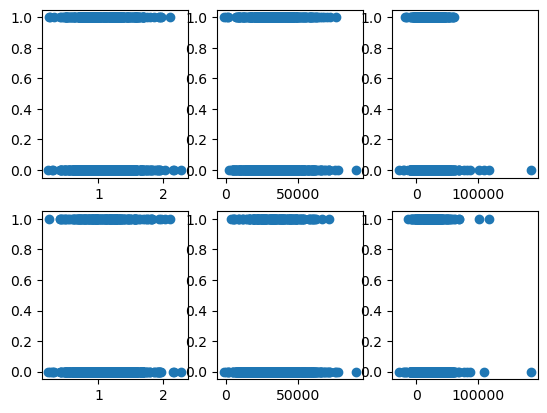

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3)

AD_poly1 = np.array(epi_0['Invasion Genotypes: Interp'])
AD_poly1[AD_poly1 <= 1] = 0
AD_poly1[AD_poly1 > 1] = 1

AD_poly2 = np.array(epi_0['Invasion Genotypes: Interp'])
AD_poly2[AD_poly2 <= 1] = 0
AD_poly2[AD_poly2 > 1] = 1

AD_poly3 = np.array(epi_0['Invasion Genotypes: Interp'])
AD_poly3[AD_poly3 <= 1] = 0
AD_poly3[AD_poly3 > 1] = 1

ax[0,0].scatter(epi_0['Slope'], AD_poly1)
ax[0,1].scatter(epi_1['Slope'], AD_poly2)
ax[0,2].scatter(epi_2['Slope'], AD_poly3)

P_poly1 = np.array(epi_0['Invasion Genotypes: Pareto'])
P_poly1[P_poly1 >= 1] = 1
P_poly1[P_poly1 < 1] = 0

P_poly2 = np.array(epi_0['Invasion Genotypes: Pareto'])
P_poly2[P_poly2 >= 1] = 1
P_poly2[P_poly2 < 1] = 0

P_poly3 = np.array(epi_0['Invasion Genotypes: Pareto'])
P_poly3[P_poly3 >= 1] = 1
P_poly3[P_poly3 < 1] = 0

ax[1,0].scatter(epi_0['Slope'], P_poly1)
ax[1,1].scatter(epi_1['Slope'], P_poly2)
ax[1,2].scatter(epi_2['Slope'], P_poly3)